In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
labels = pd.read_csv('labels.csv')

In [32]:
# get dogbreed list
NUMBERCLASS = 120
selected_breed_list = labels.groupby('breed').count().sort_values('id',ascending=False).head(NUMBERCLASS).index
labels = labels[labels['breed'].isin(selected_breed_list)]

In [33]:
#set breed_list index for labels
labels['index'] = 0
for i in range(NUMBERCLASS):
    labels.loc[labels['breed'] == selected_breed_list[i],'index'] = i

In [34]:
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
data = []
for i in tqdm(labels.index):
    img = cv2.imread('train/'+labels['id'][i]+".jpg")
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img_gray,(300,300),interpolation=cv2.INTER_CUBIC)
    data.append(img_resize)
data = np.asarray(data)

100%|██████████| 10222/10222 [01:19<00:00, 127.93it/s]


In [36]:
data = data.reshape(data.shape[0],-1)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized',
          whiten=True)
pca.fit(data)
#data_pca = pca.transform(data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [30]:
data_pca.shape

(5720, 50)

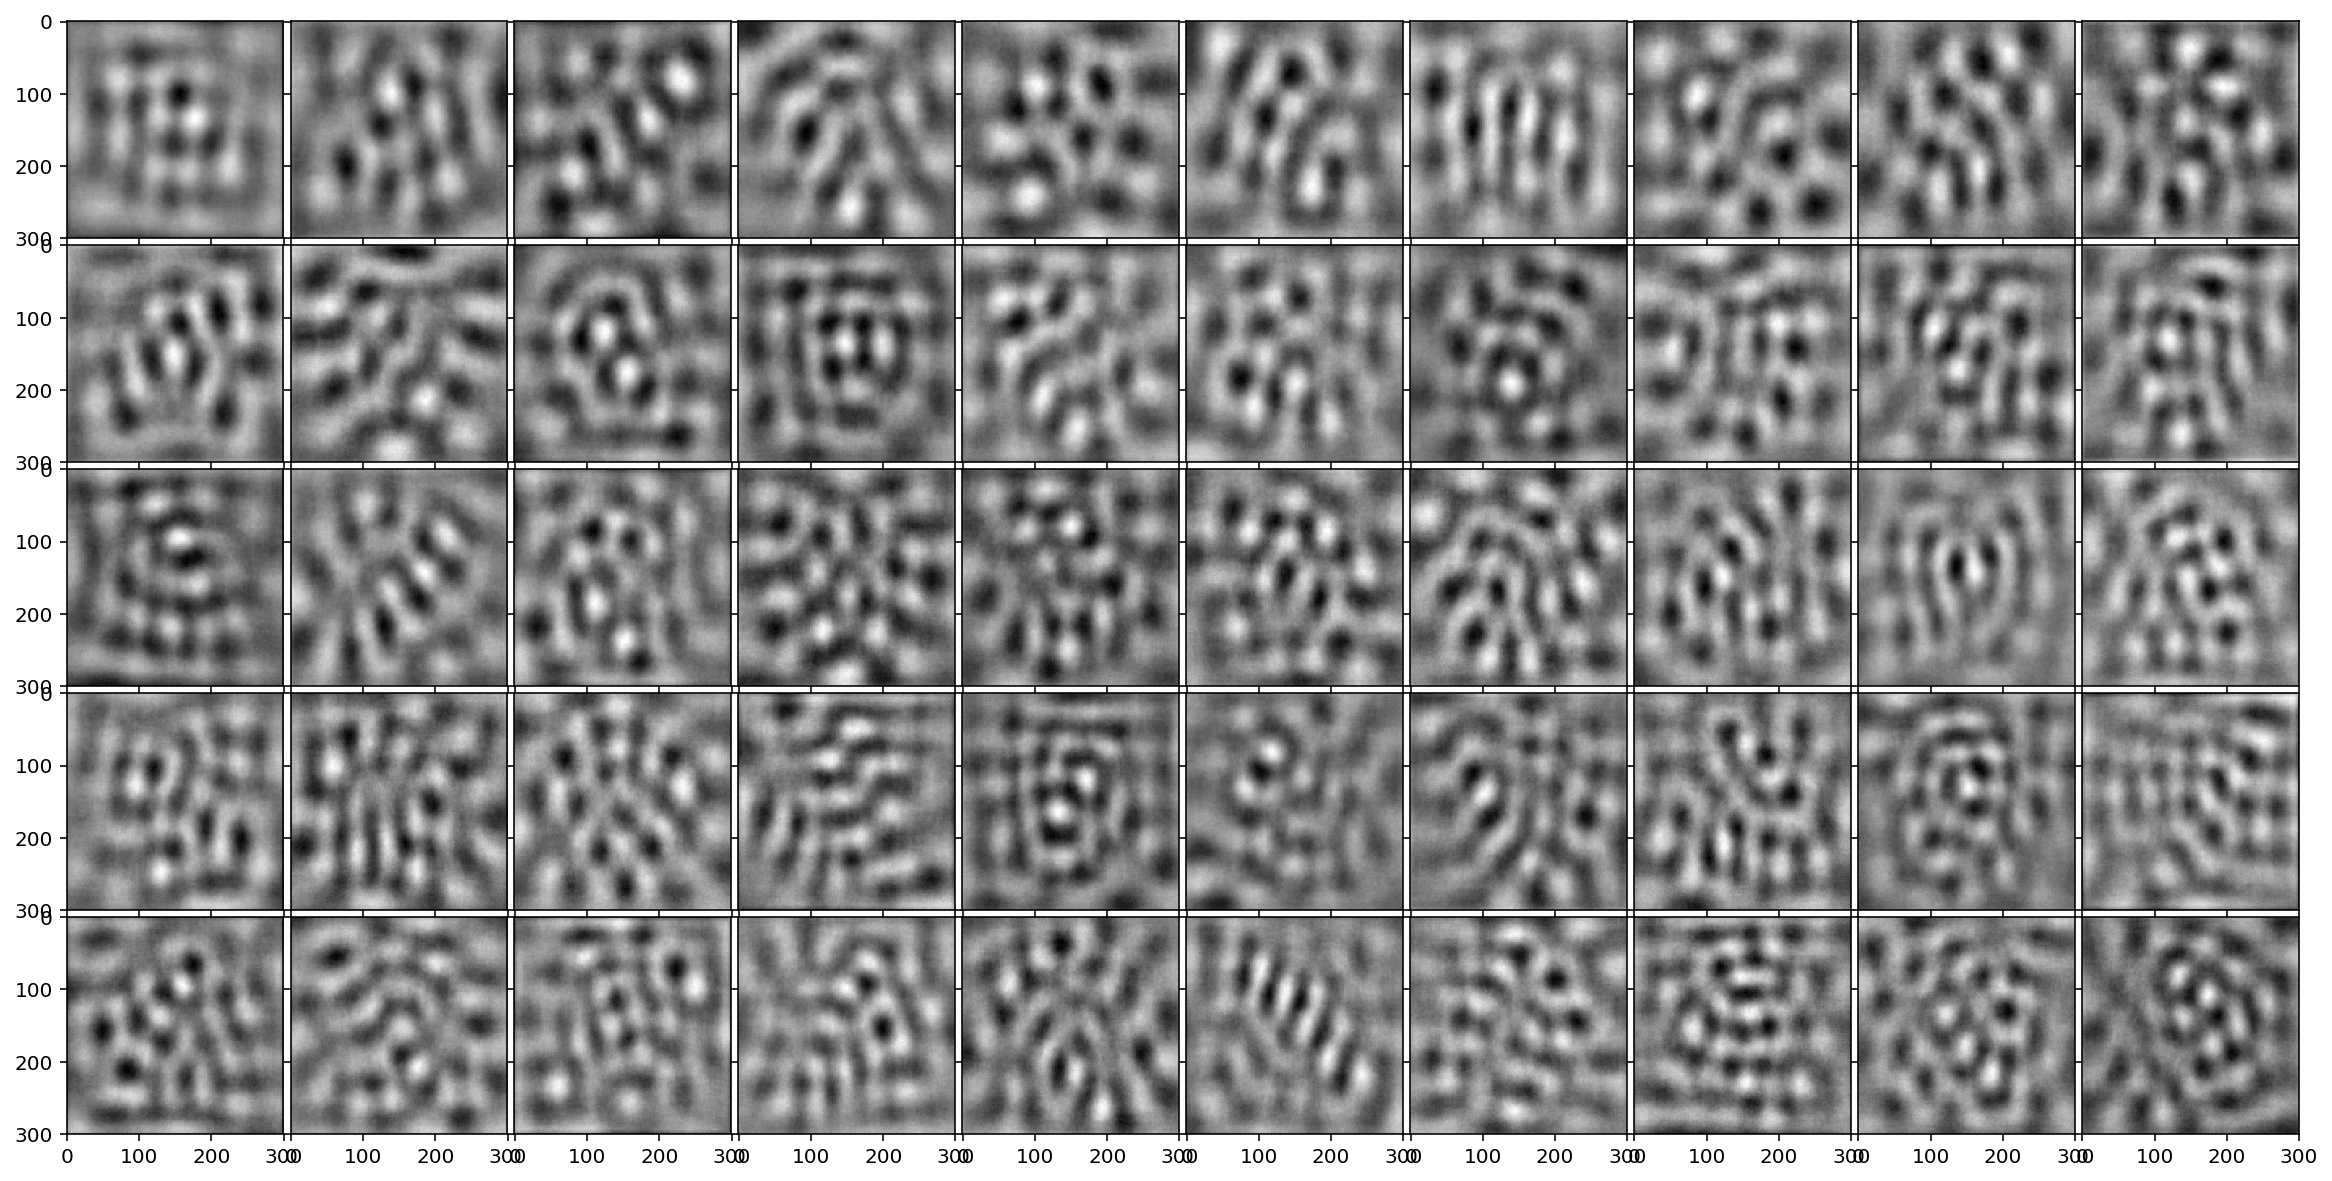

In [39]:
#plot feature map
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1, figsize=(20, 20))
plt.gray()
grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.05)
for i in range(50):
    ax = grid[i]
    ax.imshow(pca.components_[i+50].reshape(300,300))
    
plt.show()

## test data index identify with label.index

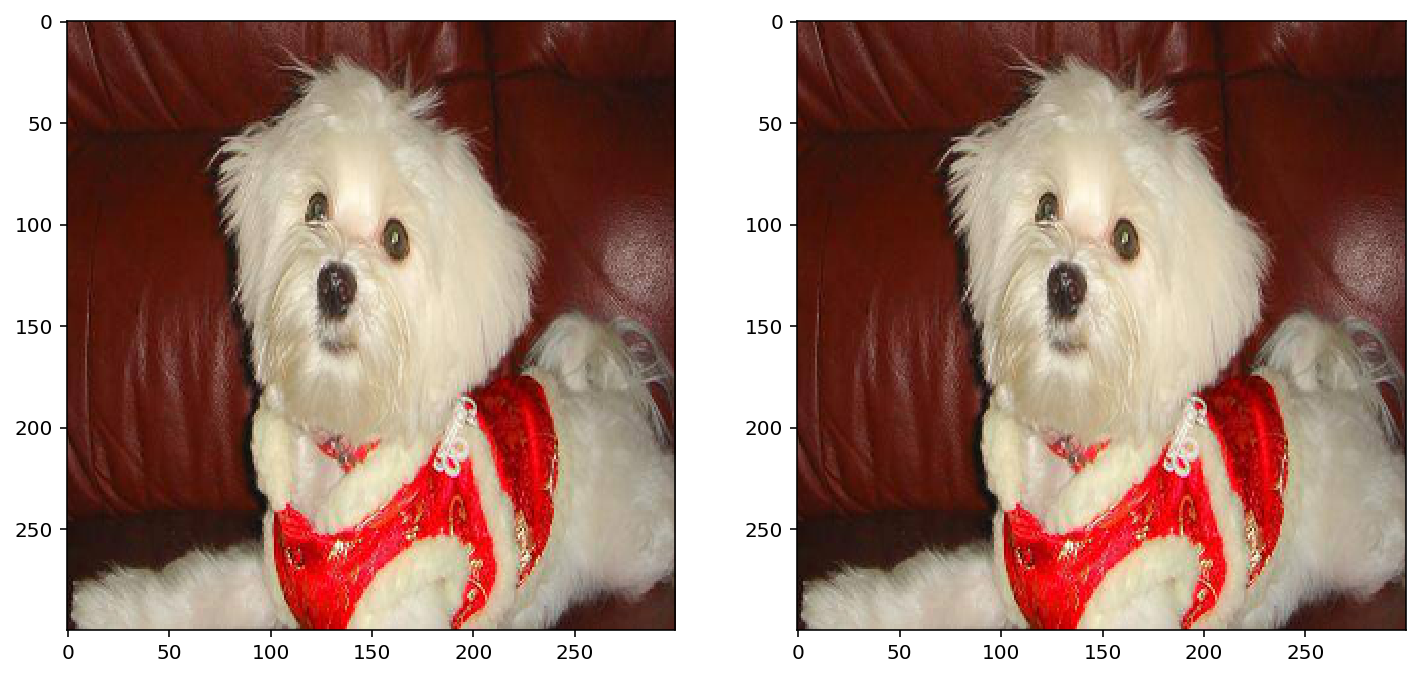

In [23]:
ID = 6
img = cv2.imread('train/'+labels['id'][labels.index[ID]]+'.jpg')
img_resize = cv2.resize(img,(300,300),interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_resize[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(data[ID][:,:,::-1])
plt.show()